In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_excel('Features_2500RPM_15dB.xlsx')
df.shape

(3500, 99)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 99 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Mp_1        3500 non-null   float64
 1   Mp_2        3500 non-null   float64
 2   Mp_3        3500 non-null   float64
 3   Mp_4        3500 non-null   float64
 4   Mp_5        3500 non-null   float64
 5   Mp_6        3500 non-null   float64
 6   mu_1        3500 non-null   float64
 7   mu_2        3500 non-null   float64
 8   mu_3        3500 non-null   float64
 9   mu_4        3500 non-null   float64
 10  mu_5        3500 non-null   float64
 11  mu_6        3500 non-null   float64
 12  F_k1        3500 non-null   int64  
 13  F_k2        3500 non-null   float64
 14  F_k3        3500 non-null   float64
 15  F_k4        3500 non-null   float64
 16  F_k5        3500 non-null   float64
 17  F_k6        3500 non-null   float64
 18  F_k7        3500 non-null   float64
 19  F_k8        3500 non-null  

In [4]:
df.isna().sum()

Mp_1          0
Mp_2          0
Mp_3          0
Mp_4          0
Mp_5          0
             ..
fcomb4        0
fcomb5        0
fcomb6        0
4 - Class     0
14 - Class    0
Length: 99, dtype: int64

In [5]:
##spilitting the data into x (features) and y (label)
x=df.iloc[:,:-14].values
y_14=df.iloc[:,-1].values
y_4=df.iloc[:,-2].values
yy4=y_4

In [6]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [7]:
yy4=lb.fit_transform(yy4)
yy4

array([1, 1, 1, ..., 3, 3, 3])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, yy4, test_size = 0.2, random_state = 10)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
# Fitting Random Forest Classification to the Training set
classifier_1 = RandomForestClassifier( random_state = 0)
classifier_1.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

# hyperparameter tunning

In [12]:
#List Hyperparameters that we want to tune.
n_estimators = list(range(10,100))
criterion = ['entropy','gini']
#Convert to dictionary
hyperparameters = dict( n_estimators=n_estimators, criterion=criterion)
#Create new KNN object
Rf = RandomForestClassifier()
#Use GridSearch
clf = GridSearchCV(Rf, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best criterion:', best_model.best_estimator_.get_params()['criterion'])
print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])

Best criterion: entropy
Best n_estimators: 84


In [39]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 84, criterion = 'entropy', random_state = 10)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=84, random_state=10)

In [40]:
y_pred = classifier.predict(X_test)

In [41]:
y_pred_1 = classifier_1.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_1 = confusion_matrix(y_test, y_pred_1)

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

In [44]:
cm_1

array([[306,   0,   0,   3],
       [  0,  61,   0,   0],
       [  0,   0,  47,   0],
       [  1,   0,   0, 282]], dtype=int64)

In [45]:
accuracy_score(y_test, y_pred)

0.9957142857142857

In [46]:
accuracy_score(y_test, y_pred_1)

0.9942857142857143

In [47]:
import seaborn as sn
import matplotlib.pyplot as plt
import sklearn.metrics

In [48]:
class_labels = list(y_test)
y_pred.shape
y_test.shape

(700,)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

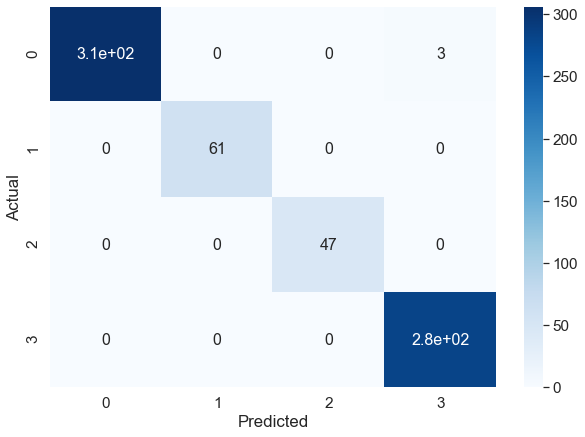

In [49]:
df_cm = pd.DataFrame(cm )
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

## 14 class classification 

In [50]:
yyy4=y_14
yyy4.shape

(3500,)

In [51]:
y_T=[y_14]

### Label encoding

In [52]:
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()
yyy4=lb.fit_transform(yyy4)
yyy4

array([ 6,  6,  6, ..., 13, 13, 13])

In [53]:
from sklearn.model_selection import train_test_split
Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(x, yyy4, test_size = 0.2, random_state = 10)

In [54]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# Xtrain2 = sc.fit_transform(Xtrain2)
# Xtest2 = sc.transform(Xtest2)

In [55]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 84, criterion = 'entropy', random_state = 0)
classifier.fit(Xtrain2, ytrain2)

RandomForestClassifier(criterion='entropy', n_estimators=84, random_state=0)

In [56]:
y_pred2 = classifier.predict(Xtest2)

In [57]:
class_labels = list(ytest2)

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm2 = confusion_matrix(ytest2, y_pred2)

In [59]:
accuracy_score(ytest2, y_pred2)

0.9885714285714285

In [60]:
import matplotlib.pyplot as plt
import sklearn.metrics

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

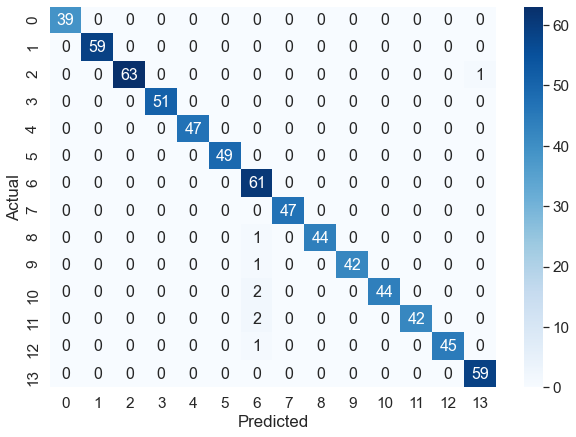

In [61]:
df_cm = pd.DataFrame(cm2)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [63]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cnt=1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(x, yy4):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 2800, Test set:700
Fold:2, Train set: 2800, Test set:700
Fold:3, Train set: 2800, Test set:700
Fold:4, Train set: 2800, Test set:700
Fold:5, Train set: 2800, Test set:700


In [72]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(RandomForestClassifier(n_estimators = 84, criterion = 'entropy', random_state = 0), x, yy4, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: { score}')
print(f'Average score of 4-Class:  {score.mean()}')

Scores for each fold are: [0.98714286 0.98857143 0.98571429 0.99571429 0.99142857]
Average score of 4-Class:  0.9897142857142857


In [71]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(RandomForestClassifier(n_estimators = 84, criterion = 'entropy', random_state = 0), x, yyy4, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score of 14 Class:  {score.mean()}')

Scores for each fold are: [0.97857143 0.98285714 0.98571429 0.98571429 0.98      ]
Average score of 14 Class:  0.9825714285714285
